In [2]:
import time
import time
import urllib
import bs4
import requests
import re
from bs4 import BeautifulSoup


from wordcloud import WordCloud

%matplotlib inline
import matplotlib.pyplot as plt

from snowballstemmer import stemmer
kokbul1 = stemmer('turkish')

with open("turkce-stop-words.txt") as file:
    stw = file.read()
stw = stw.split()
stw = [s.lower() for s in stw]



def wiki2cloud(url):
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html,"lxml")
    a_text = soup.find_all("p")
    y = [re.sub(r"<.+?>",r"",str(a)) for a in a_text]
    metin = " ".join(y)
    metin = re.sub(r"[^\w\s]"," ",metin)
    metin = metin.split()
    
    kelimeler = [kelime.lower() for kelime in kokbul1.stemWords(metin) if kelime not in stw]
    wordcloud = WordCloud(background_color="white").generate(" ".join(kelimeler))
    plt.figure(figsize=(16,10))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()    

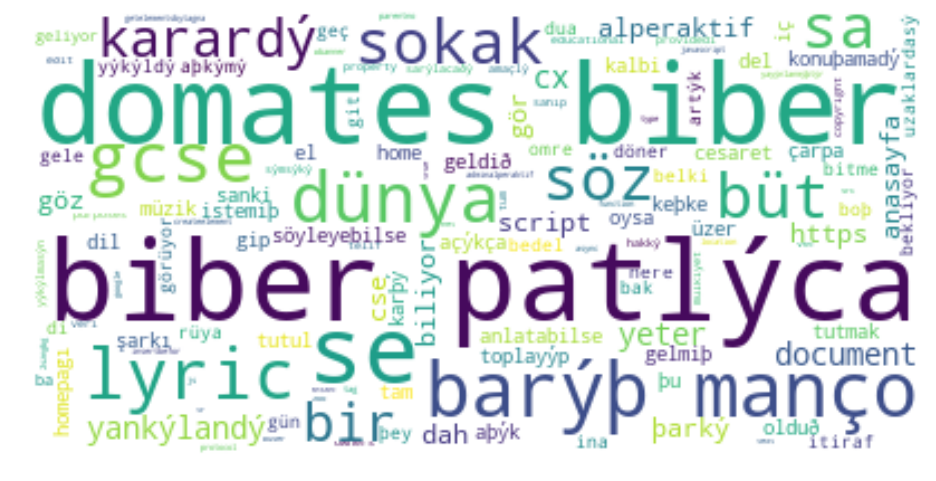

In [12]:
url1=r"http://www.alperkus.com/sarkisozleri/barismanco/domates.htm"
wiki2cloud(url1)